### Each observation (row) has been generated by one buoy. The data has roughly  70 buoys. However, the dataset doesn't provide information that relates each observation with the buoy that has created it. 

### Nevertheless, the information about the latitude and longitude of each observation give us the possibility to group the observations made by location, and then, extrapolate that each different location corresponds to a different buoy. 

In [1]:
import os
os.environ['PROJ_LIB'] = r'/home/atwenter/anaconda3/pkgs/proj4-5.2.0-he6710b0_1/share/proj'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [3]:
data = pd.read_csv('../Data/enso_data_cleaned.csv')

In [4]:
data.head()

,Unnamed: 0,obs,year,month,day,date,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,0,1,1980,3,7,1980-03-07,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,1,2,1980,3,8,1980-03-08,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,2,3,1980,3,9,1980-03-09,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,3,4,1980,3,10,1980-03-10,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,4,5,1980,3,11,1980-03-11,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19


In [5]:
location = data[['latitude', 'longitude']]

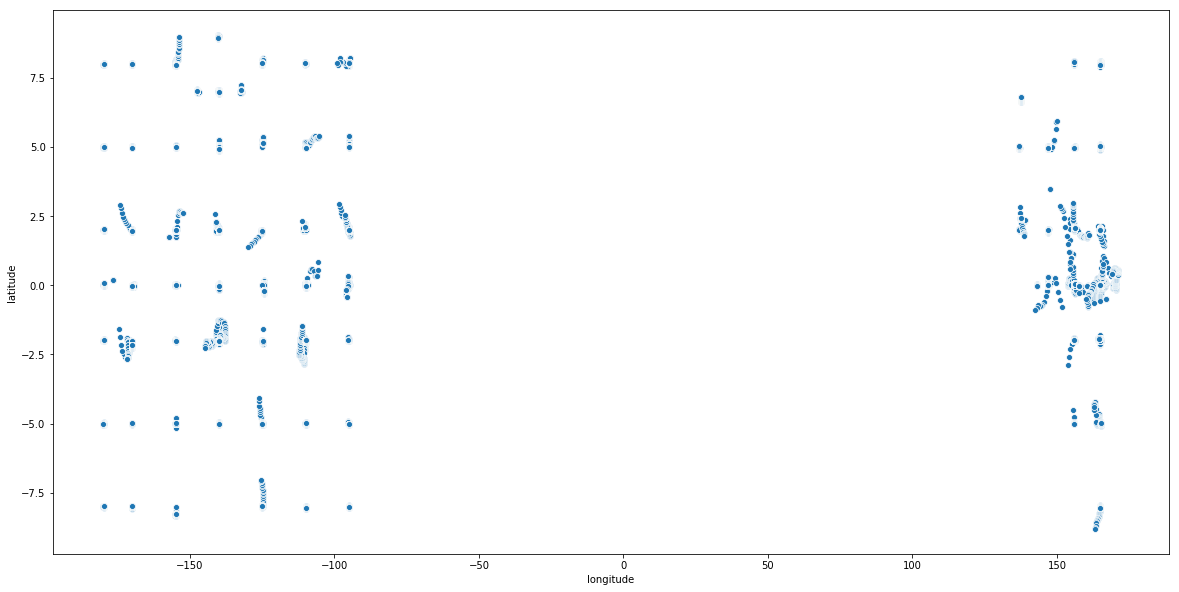

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=location['longitude'], y=location['latitude'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


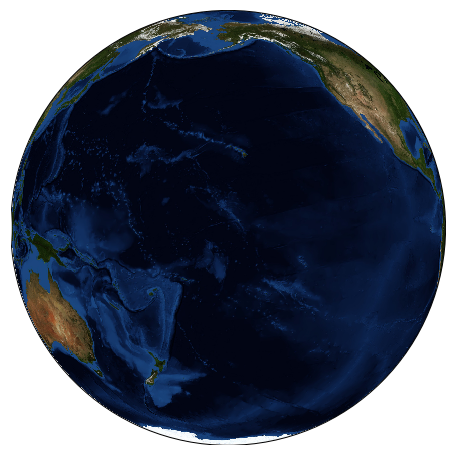

In [7]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=0, lon_0=-160)
m.bluemarble(scale=0.5);


In [8]:
location_sample = location.sample(50000)

In [9]:
location_sample.head()

,latitude,longitude
31660,0.03,-179.88
95327,5.01,-109.93
110924,4.98,156.07
109499,4.99,156.06
50905,1.98,-140.00


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


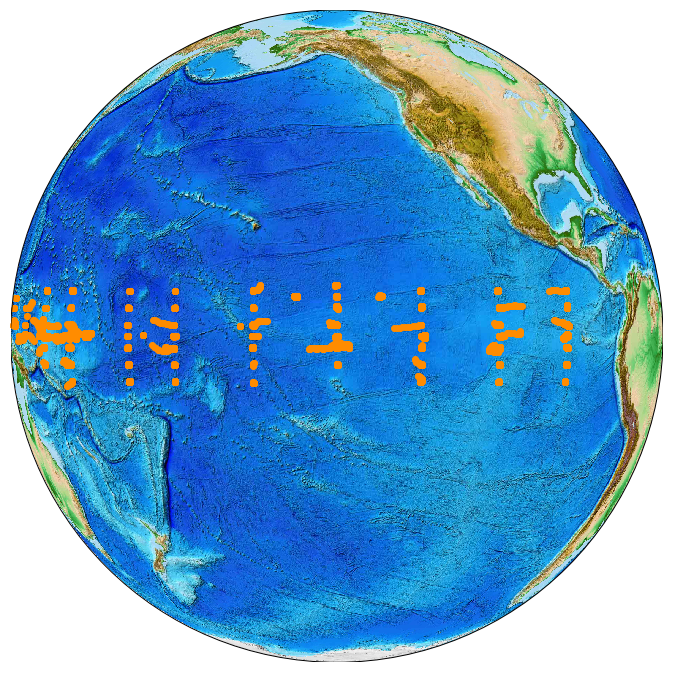

In [10]:
plt.figure(figsize=(12, 12))
m = Basemap(projection='ortho',
            resolution=None,lat_0=0,lon_0= -140)
m.etopo()

lon = list(location['longitude'])
lat = list(location['latitude'])

x, y = m(lon, lat)

m.scatter(x, y, marker='o',color='darkorange')


plt.show()


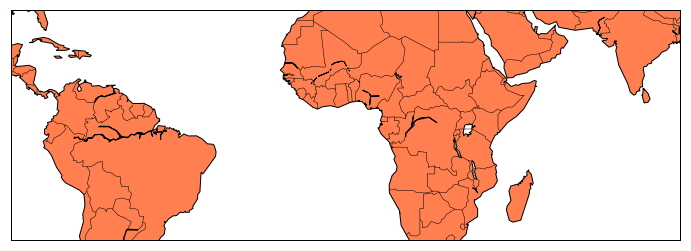

In [39]:
plt.figure(figsize=(12, 12))
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=-90, \
  urcrnrlon=90,llcrnrlat=-30,urcrnrlat=30, \
  resolution='c')

#m.etopo()

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral')
m.drawmapboundary()


#lon = list(location['longitude'])
#lat = list(location['latitude'])

#x, y = m(lon, lat)

#m.scatter(x, y, marker='o',color='darkorange')


plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/atwenter/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/atwenter/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/atwenter/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/atwenter/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixe

/home/atwenter/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/atwenter/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/atwenter/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/atwenter/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Una

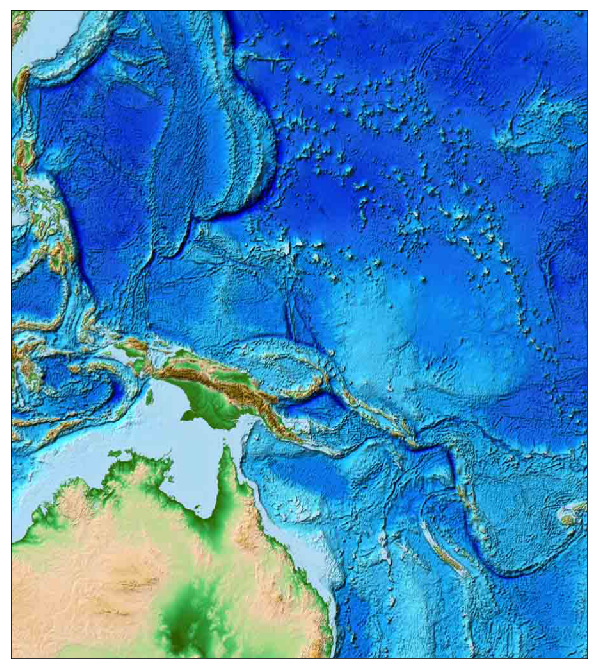

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lats1=[-30, 30]
lons1=[120, 179.99]

fig=plt.figure()
#fig.set_size_inches((7.5, 6))
fig.set_size_inches((10, 9))

ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)


bmap=Basemap(projection='merc',\
        llcrnrlat=lats1[0], llcrnrlon=lons1[0],\
        urcrnrlat=lats1[1], urcrnrlon=lons1[1],\
        lon_0=(lons1[0]+lons1[1])/2.,\
        ax=ax1)

bmap.etopo(ax = ax1)

ax1.set_position([0, 0, 0.8, 1])

lats2=[-30,30]
lons2=[-179.99, -60]
bmap=Basemap(projection='merc',\
        llcrnrlat=lats2[0], llcrnrlon=lons2[0],\
        urcrnrlat=lats2[1], urcrnrlon=lons2[1],\
        lon_0=(lons2[0]+lons2[1])/2.,\
        ax=ax2)

bmap.etopo(ax = ax2)
ax2.set_position([0.8, 1, 0, 0])

ax1.set_aspect('auto')
ax2.set_aspect('auto')

ax1.set_adjustable('datalim')
ax2.set_adjustable('datalim')

plt.show()

### Try Folium

In [12]:
import folium 

In [13]:
map_hooray = folium.Map(location=[0, -130],
                    tiles='Stamen Terrain',
                    zoom_start = 3)

In [14]:
map_hooray

### I discard it because it does not provide terrain information of the ocean.